### Fake news detection

In [1]:
#importing the data set in our notebook
import pandas as pd
import numpy as np
df=pd.read_csv("train_news.csv")
df.head(7)

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
5,5,3196,Whatever the Outcome on November 8th the US Wi...,NaN,Taming the corporate media beast Whatever the ...,1
6,6,5134,Rapid Evolution Saved This Fish From Pollution...,JoAnna Klein,The State of New Jersey says you can’t eat the...,0


### Exploratory data analysis

In [2]:
#checking the size of the data
df.shape

(20800, 6)

#### observations
* The dataset has 20800 rows and 6 columns

In [3]:
# chceking the columns present in dataset
df.columns

Index(['Unnamed: 0', 'id', 'headline', 'written_by', 'news', 'label'], dtype='object')

In [4]:
#checking the datatype
df.dtypes

Unnamed: 0     int64
id             int64
headline      object
written_by    object
news          object
label          int64
dtype: object

#### observations:
   * There are 3 integer columns they are unnamed,id and label
   * The object columns are "headline" ,"written_by" ,"news"

In [5]:
df.dtypes.value_counts()

int64     3
object    3
dtype: int64

In [6]:
#checking for null values
df.isnull().sum()

Unnamed: 0       0
id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

#### observations:
* There are 558 null values in "headline" and "1957" nulls in "written by" , news has 39 null values

In [7]:
#returns boolean value for NaN values present in the data
df.isnull().any()

Unnamed: 0    False
id            False
headline       True
written_by     True
news           True
label         False
dtype: bool

#### Before we begin the analysis we shall drop the id and unnamed columns as both of them have unique values for each record

In [8]:
#drop columns "unnamed 0" and "id"
df.drop(columns=["Unnamed: 0","id"],axis=1,inplace=True)
df.sample(5)

,headline,written_by,news,label
7933,UN Gay Rights Envoy: Religious Freedom ‘Not an...,"Thomas D. Williams, Ph.D.",The United Nations envoy for gay rights has de...,0
13327,’Manchester’: The Missing Word in the Fourth C...,Joel B. Pollak,The United States Court of Appeals for the Fou...,0
18270,"In a Week, Trump Reshapes Decades of Perceptio...",David E. Sanger,"WASHINGTON — By some measures, President Tr...",0
2866,CT Gov. Malloy Instructs School Superintendent...,Dr. Susan Berry,Connecticut Gov. Dannel Malloy ( ) issued an e...,0
11874,New Biometric ID System Being Implemented in U...,The Daily Sheeple,\nA new way to get through airport security ha...,1


In [9]:
#drop any duplicate values from the dataframe
#print("original shape=",df.shape)
df.drop_duplicates(subset=None,inplace=False)
df.head()
print("after removing duplicates shape=",df.shape)

after removing duplicates shape= (20800, 4)


* As the original and above shape is same we can say there are no duplicate rows

In [10]:
# drop the null values in news
# it had only 39 null values
df.dropna(subset=['news'],inplace=True)

In [11]:
#for rest two columns i.e headlines and written by we will add a seperate field there as "Text unavailable"
df=df.fillna("text unavailable")

In [12]:
#reset the index after dropping the null value
df.reset_index(inplace=True)

In [13]:
# check if all the null values are replaced 
df.isnull().sum()

index         0
headline      0
written_by    0
news          0
label         0
dtype: int64

* Now our data is free from all NaN values

### Visualizations

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

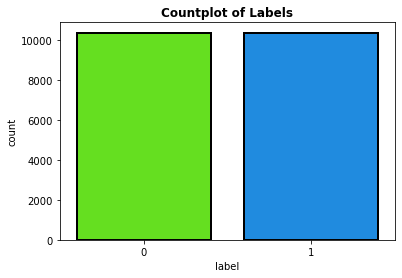

0    10387
1    10374
Name: label, dtype: int64


In [15]:
#countplot of labels
sns.countplot(df.label,palette='gist_rainbow',edgecolor='k',linewidth=2)
plt.title("Countplot of Labels",fontweight='bold')
plt.show()
print(df.label.value_counts())

#### observations:
    
   * There are 10374 records for fake news(1)
   * There are 10387 real news(0)

average length of news: 4552.715


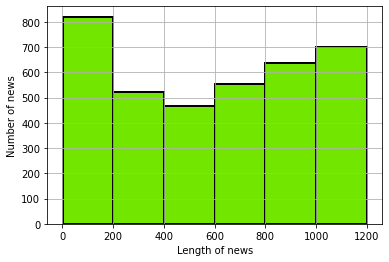

In [16]:
#plotting the average length of news
news=df["news"]
x = [len(news[i]) for i in range(news.shape[0])]

print('average length of news: {:.3f}'.format(sum(x)/len(x)) )
bins = [1,200,400,600,800,1000,1200]
plt.hist(x, bins=bins,color='#73e600',edgecolor='k',linewidth=2)
plt.xlabel('Length of news')
plt.ylabel('Number of news')       
plt.grid(True)
plt.show()

#### observations:
   * There were large number of news with length between 0 to 200 words and between 1000 to 1200 

average length of headlines: 72.709


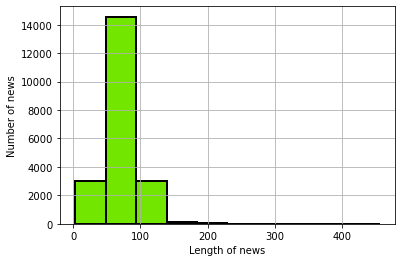

In [17]:
#plotting the average length of headlines
headlines=df["headline"]
x = [len(headlines[i]) for i in range(headlines.shape[0])]

print('average length of headlines: {:.3f}'.format(sum(x)/len(x)) )
plt.hist(x,color='#73e600',edgecolor='k',linewidth=2)
plt.xlabel('Length of news')
plt.ylabel('Number of news')       
plt.grid(True)
plt.show()

#### Observation:
   * The average length of headline can be seen as 72 

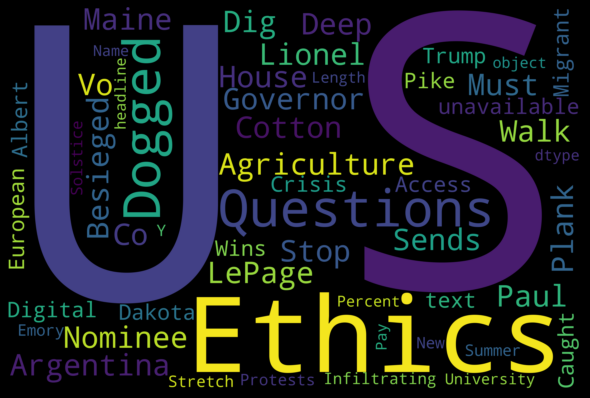

In [18]:
#wordcloud for headlines
from wordcloud import WordCloud, STOPWORDS
text = df["headline"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (8,12),
    facecolor = 'k',
    edgecolor = 'y')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Observations:
   * The loud words in headlines were US,ethics,Agriculture,questions Argentina Etc.
   * This shows most of the news included US as its topic and were mostly concerned with politics as we can see words like Trump,Lionel,House,Governor etc

#### For better visualizations we have split the dataset according to the labels (1 and 0)

In [19]:
#assign fake news(label 1) to df_fake
df_fake = df[df['label']== 1]
df_fake.sample(3)

,index,headline,written_by,news,label
13957,13982,"Donald Trump Uses ""Beautiful"" Scissors to Cut ...",Kate Bennett,Getty - Chip Somodevilla \nApproximately 300 m...,1
5953,5964,Mark Ruffalo Reportedly Placed on U.S. Terrori...,Alex Ansary,Mark Ruffalo Reportedly Placed on U.S. Terrori...,1
16971,17003,WATCH: BlackLivesMatter Cop Hater Slaps Police...,admin,WATCH: BlackLivesMatter Cop Hater Slaps Police...,1


In [20]:
#assign true news(label 0) to df_true
df_true=df[df['label']== 0]
df_true.sample(3)

,index,headline,written_by,news,label
18911,18946,Cartel Smugglers Becoming More Aggressive Agai...,Ildefonso Ortiz,"MCALLEN, Texas — A recent border shooting w...",0
12405,12429,"Chris Wallace, In-House Moderate at Fox News, ...",Michael M. Grynbaum,WASHINGTON — It seemed like a chummy reunio...,0
13678,13703,Cincinnati Mayor: We Are Now a Sanctuary City,John Binder,The mayor of Cincinnati has declared his munic...,0


In [21]:
#cross check if df_fake only have labels=1
df_fake.label.value_counts()

1    10374
Name: label, dtype: int64

In [22]:
#cross check if df_true only have labels=0
df_true.label.value_counts()

0    10387
Name: label, dtype: int64

#### Word clouds for real news

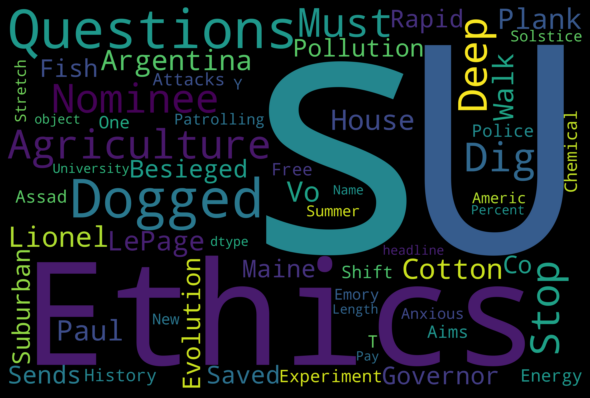

In [23]:
#plotting loud words for true new's headlines
text = df_true["headline"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (8,12),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### observations:
* The most used words were US,Ethics,Questions,dogged,Agriculture,etc

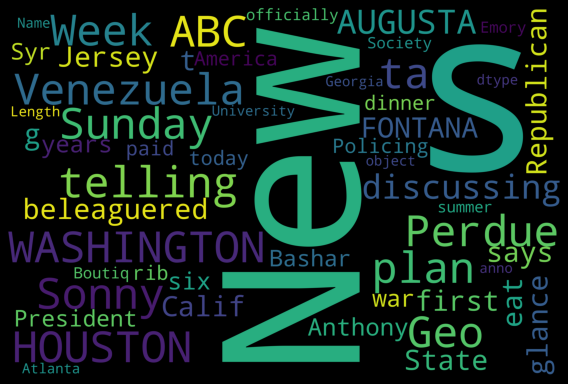

In [24]:
#plotting loud words for true new's news
text = df_true["news"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (8,12),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout()
plt.show()

#### observations:
* The most used words were New ,Venezuela,Houston,Washington,Sonny ,ABC,Predue, Sunday Plan,telling,Geo,etc

#### Visualizations for fake news

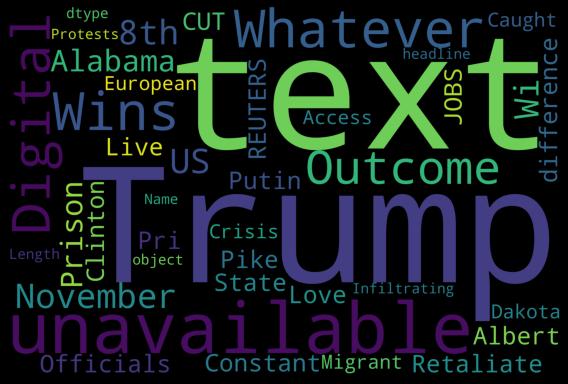

In [25]:
#plotting loud words for fake new's headlines
text = df_fake["headline"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (8,12),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout()
plt.show()

#### observations:
* The most used words were Trump,text,Outcome,November,wins,Digital,Albama,mentioned,prison,etc

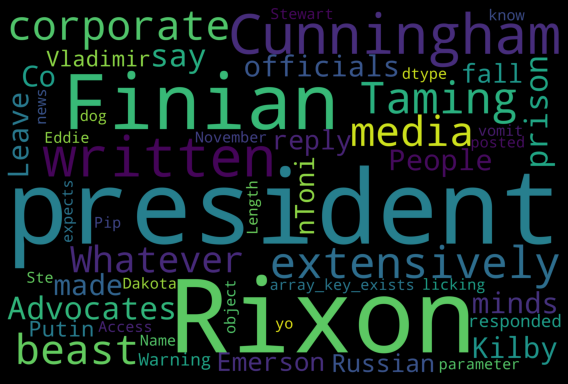

In [26]:
#plotting loud words for fake new's news
text = df_fake["news"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (8,12),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout()
plt.show()

#### observations:
* The most used words were Rixon,Cunningham,president,written,Finian,Advocates,etc

# Text pre-processing

#### 1) Remove any html tag present in the text

In [27]:
#removing html tags
import re
def remove_html(headline_text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',headline_text)

In [28]:
#apply the function on all text columns
df['headline'] = df['headline'].apply(remove_html)
df['news']=df['news'].apply(remove_html)
df["written_by"]=df["written_by"].apply(remove_html)

#### 2) Remove punctuations

In [29]:
#removing punctuations for text
def remove_punctuations(text):
    return re.sub(r'[^\w\s]','',text)

In [30]:
#apply the function on all text columns
df['headline'] = df['headline'].apply(remove_punctuations)
df['news']=df['news'].apply(remove_punctuations)
df["written_by"]=df["written_by"].apply(remove_punctuations)

#### 3) Lowercase the entire text

In [31]:
#lowercase all the text columns
df["headline"]=df['headline'].str.lower()
df['news']=df['news'].str.lower()
df["written_by"]=df["written_by"].str.lower()

#### 4) Eliminate strings which do not contain alphanumeric data

In [32]:
#keep only characters from Aa to Zz and numbers
def cleaning(text):
    return re.sub('[^A-Za-z0-9]+', ' ',text)

In [33]:
#apply the function on all text columns
df['headline'] = df['headline'].apply(cleaning)
df['news']=df['news'].apply(cleaning)
df["written_by"]=df["written_by"].apply(cleaning)

In [34]:
df.head()

,index,headline,written_by,news,label
0,0,ethics questions dogged agriculture nominee as...,eric lipton and steve eder,washington in sonny perdues telling georgians ...,0
1,1,us must dig deep to stop argentinas lionel mes...,david waldstein,houston venezuela had a plan it was a tactical...,0
2,2,cotton to house do not walk the plank and vote...,pam key,sunday on abcs this week while discussing the ...,0
3,3,paul lepage besieged maine governor sends conf...,jess bidgood,augusta me the beleaguered republican governor...,0
4,4,a digital 911 if trump wins,finian cunningham,finian cunningham has written extensively on ...,1


We have not removed the numbers in the text because some figures might be useful in news.

In [35]:
# def remove_digits(text):
#     return ''.join([i for i in text if not i.isdigit()])

In [36]:
# df['headline'] = df['headline'].apply(remove_digits)
# df['news']=df['news'].apply(remove_digits)
# df["written_by"]=df["written_by"].apply(remove_digits)

#### 5) Remove stopwords

In [37]:
#import library for stopwords removal
from nltk.corpus import stopwords

In [38]:
#removing stopwords
stop_words = set(stopwords.words('english'))
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)
#apply the remove_stopwords function
df['headline'] = df['headline'].apply(removeStopWords)
df['news']=df['news'].apply(removeStopWords)
df["written_by"]=df["written_by"].apply(removeStopWords)
df.head()

,index,headline,written_by,news,label
0,0,ethics questions dogged agriculture nominee g...,eric lipton steve eder,washington sonny perdues telling georgians g...,0
1,1,us must dig deep stop argentinas lionel messi...,david waldstein,houston venezuela plan tactical approach ...,0
2,2,cotton house walk plank vote bill cann...,pam key,sunday abcs week discussing republican pla...,0
3,3,paul lepage besieged maine governor sends conf...,jess bidgood,augusta beleaguered republican governor mai...,0
4,4,digital 911 trump wins,finian cunningham,finian cunningham written extensively inter...,1


#### 6) Lemmatization

In [39]:
#lemmatization
from nltk.stem import WordNetLemmatizer
def lemma_txt(text):
    ss = WordNetLemmatizer()
    return "".join([ss.lemmatize(w) for w in text])

#apply lemma_txt
df['headline'] = df['headline'].apply(lemma_txt)
df['news']=df['news'].apply(lemma_txt)
df["written_by"]=df["written_by"].apply(lemma_txt)
df.head()

,index,headline,written_by,news,label
0,0,ethics questions dogged agriculture nominee g...,eric lipton steve eder,washington sonny perdues telling georgians g...,0
1,1,us must dig deep stop argentinas lionel messi...,david waldstein,houston venezuela plan tactical approach ...,0
2,2,cotton house walk plank vote bill cann...,pam key,sunday abcs week discussing republican pla...,0
3,3,paul lepage besieged maine governor sends conf...,jess bidgood,augusta beleaguered republican governor mai...,0
4,4,digital 911 trump wins,finian cunningham,finian cunningham written extensively inter...,1


### Feature extraction

#### Combining all the three text columns i.e. "headline" + "news"+"written_by" for word vectorization

In [40]:
#combining all three columns together and assign the combined corpus to x(independent variable)
x= (df['written_by'] + ' ' + df['headline'] + ' ' +df['news'])

In [41]:
x.head()

0    eric lipton  steve eder ethics questions dogge...
1    david waldstein us must dig deep  stop argenti...
2    pam key cotton  house   walk  plank  vote   bi...
3    jess bidgood paul lepage besieged maine govern...
4    finian cunningham  digital 911  trump wins  fi...
dtype: object

In [42]:
# assign label to y variable
y=df['label']
y.sample(2)

2886     0
17807    0
Name: label, dtype: int64

In [43]:
#check the shapes of x and y
print("x.shape = ",x.shape)
print("y.shape = ",y.shape)

x.shape =  (20761,)
y.shape =  (20761,)


#### TF-IDF

In [44]:
#transforming words to vectors
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features =2000)
x = tf.fit_transform(x)
x

<20761x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 3197326 stored elements in Compressed Sparse Row format>

In [45]:
# visualize the sparse matrix we obtained after tf-idf transform (feature names)
df_features=pd.DataFrame(x.toarray(),columns=tf.get_feature_names())
df_features

,000,10,100,11,12,13,14,15,16,17,...,yes,yet,york,youll,young,youre,youve,zero,zika,zone
0,0.095995,0.000000,0.084305,0.000000,0.0,0.024600,0.000000,0.000000,0.00000,0.0,...,0.0,0.000000,0.012325,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.028846,0.000000,0.069951,0.0,0.000000,0.000000,0.067839,0.00000,0.0,...,0.0,0.000000,0.019848,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.024577,0.018027,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20756,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.000000,0.000000,0.606347,0.0,0.0,0.0,0.0,0.0,0.0
20757,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
20758,0.000000,0.000000,0.000000,0.000000,0.0,0.030975,0.030948,0.000000,0.03103,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
20759,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.000000,0.038569,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


### Train-Test Split

In [46]:
#splitting data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
print("Train shapes : X = {}, y = {}".format(x_train.shape,y_train.shape))
print("Test shapes : X = {}, y = {}".format(x_test.shape,y_test.shape))

Train shapes : X = (16608, 2000), y = (16608,)
Test shapes : X = (4153, 2000), y = (4153,)


### Model Building

In [47]:
#importing libraries for model building
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#boosting model

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# metrics for evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn .metrics import roc_auc_score,auc,roc_curve

### 1) Logistic Regression

#### NOTE: while finding hyperparameters we are only taking a subset of train data to reduce the runtime.

In [48]:
#hypertuning for logistic regression
lg=LogisticRegression()
parameters={'penalty':['l1','l2','elasticnet'],'class_weight':['dict','balanced']}
                      
clf=GridSearchCV(lg,parameters)
clf.fit(x_train[0:2001],y_train[0:2001])  # subset of train data
print(clf.best_params_)

{'class_weight': 'dict', 'penalty': 'l2'}


In [49]:
lg=LogisticRegression(penalty='l2',class_weight='dict')
lg.fit(x_train,y_train)
lg_pred = lg.predict(x_test) #  predictions

#accuracy and cross validation scores
lg_accuracy= accuracy_score(y_test,lg_pred)*100
print(" Accuracy of logistic regression is  = ",lg_accuracy)
lg_cv=cross_val_score(lg,x,y,cv=3).mean()*100
print("cross validation score=",lg_cv)
print("\n")

#auc
lg_auc = np.round(roc_auc_score(y_test,lg_pred), 3) 
print("Auc for logistic regression is {}". format(lg_auc))
print("\n")

# classification report and confusion matrix
print("Confusion matrix \n ",confusion_matrix(y_test,lg_pred))
print("\n")
print("classification report for logistic\n\n",classification_report(y_test,lg_pred))


 Accuracy of logistic regression is  =  96.3159162051529
cross validation score= 95.72757536959226


Auc for logistic regression is 0.963


Confusion matrix 
  [[1996   82]
 [  71 2004]]


classification report for logistic

               precision    recall  f1-score   support

           0       0.97      0.96      0.96      2078
           1       0.96      0.97      0.96      2075

    accuracy                           0.96      4153
   macro avg       0.96      0.96      0.96      4153
weighted avg       0.96      0.96      0.96      4153



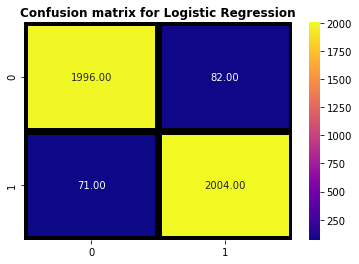

In [50]:
#heatmap of confusion matrix for logistic regression
sns.heatmap(confusion_matrix(y_test,lg_pred),annot=True,fmt='0.2f',linewidth=6,linecolor='Black',cmap='plasma')
plt.title("Confusion matrix for Logistic Regression",fontweight='bold')
plt.show()

#### Observations:
   * There were 1996 true positives and 2004 True negatives
   * 71 False Negatives and 82 False postives
   * That is in all there were (82+71)= 153 errors

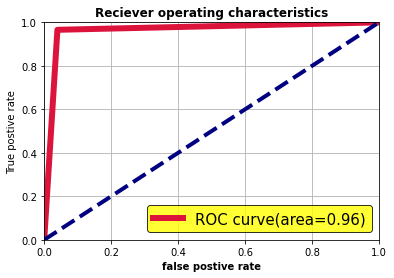

In [51]:
#auc curve for logistic regression
fpr,tpr,thresholds=roc_curve(y_test,lg_pred)
roc_auc=auc(fpr,tpr)

plt.plot(fpr,tpr,color='Crimson',lw=6,label='ROC curve(area=%0.2f)'% roc_auc) 
plt.plot([0,1],[0,1],color='navy',lw=4,linestyle='--')

plt.xlim([0,1]) #limit on the scale from 0 to 1
plt.ylim([0,1])
plt.grid()

plt.xlabel("false postive rate",fontweight='bold')
plt.ylabel("True postive rate")
plt.title("Reciever operating characteristics",fontweight='bold')

plt.legend(loc="lower right",edgecolor='k',facecolor='Yellow',fontsize=15)
plt.show()

#### Observations:
    
   * The AUc is 0.96 for logistic regression 

### 2) Passive aggresive classifier

In [52]:
#hypertuning for passive aggressive classifier
pac=PassiveAggressiveClassifier()
parameters={'fit_intercept':[True,False],'max_iter':[1000,2000,3000],
            'loss':['hinge','squared_hinge'],'warm_start':[False,True],
            'class_weight':[None,'balanced']}                    
clf=GridSearchCV(pac,parameters)
clf.fit(x_train[0:2001],y_train[0:2001])
print(clf.best_params_)

{'class_weight': None, 'fit_intercept': True, 'loss': 'hinge', 'max_iter': 1000, 'warm_start': True}


In [53]:
pac=PassiveAggressiveClassifier(loss='hinge',fit_intercept=True,max_iter=3000,warm_start=True,class_weight=None ,shuffle=True,)
pac.fit(x_train,y_train)
pac_pred = pac.predict(x_test) 

#accuracy and cross validation score
pac_accuracy=accuracy_score(y_test,pac_pred)*100
print(" Accuracy of passive aggressive classifier is = ", pac_accuracy)
pac_cv=cross_val_score(pac,x,y,cv=3).mean()*100
print("cross validation score=",pac_cv)
print("\n")

#auc
pac_auc = np.round(roc_auc_score(y_test,pac_pred), 3) 
print("Auc for passive aggresive classifier is {}". format(pac_auc))
print("\n")

#classification report and confusion matrix
print("Confusion matrix \n\n ",confusion_matrix(y_test,pac_pred))
print("\n")
print("classification report for passive aggresive classifier \n\n",classification_report(y_test,pac_pred))


 Accuracy of passive aggressive classifier is =  95.16012521069108
cross validation score= 94.89909239952462


Auc for passive aggresive classifier is 0.952


Confusion matrix 

  [[1983   95]
 [ 106 1969]]


classification report for passive aggresive classifier 

               precision    recall  f1-score   support

           0       0.95      0.95      0.95      2078
           1       0.95      0.95      0.95      2075

    accuracy                           0.95      4153
   macro avg       0.95      0.95      0.95      4153
weighted avg       0.95      0.95      0.95      4153



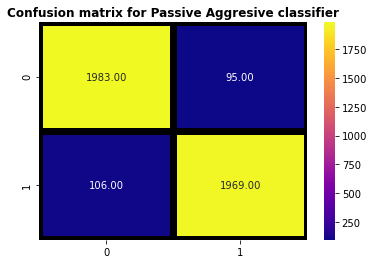

In [54]:
#heatmap of confusion matrix for passive aggresive classifier
sns.heatmap(confusion_matrix(y_test,pac_pred),annot=True,fmt='0.2f',linewidth=6,linecolor='Black',cmap='plasma')
plt.title("Confusion matrix for Passive Aggresive classifier",fontweight='bold')
plt.show()

#### Observations:
   * There were 1983 true positives and 1969 True negatives
   * 106 False Negatives and 95 False postives
   * That is in all there were (106+95)= 201 errors

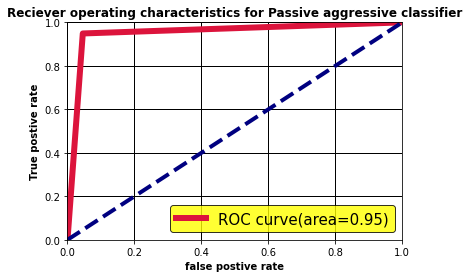

In [55]:
#auc roc curve for passive aggresive classifier
fpr,tpr,thresholds=roc_curve(y_test,pac_pred)
roc_auc=auc(fpr,tpr)

plt.plot(fpr,tpr,color='Crimson',lw=6,label='ROC curve(area=%0.2f)'% roc_auc) 
plt.plot([0,1],[0,1],color='navy',lw=4,linestyle='--')

plt.xlim([0,1]) #limit on the scale from 0 to 1
plt.ylim([0,1])
plt.grid(color='k', linewidth=1)
plt.xlabel("false postive rate",fontweight='bold')
plt.ylabel("True postive rate",fontweight='bold')
plt.title("Reciever operating characteristics for Passive aggressive classifier",fontweight='bold')

plt.legend(loc="lower right",edgecolor='k',facecolor='Yellow',fontsize=15)
plt.show()

#### Observations:
    
   * The AUc is 0.95 for passive aggressive classifier 

### 3) KNN

In [56]:
#hypertunning KNN Classifier
knn=KNeighborsClassifier()
parameters={"n_neighbors":[4,6,8],"weights":['uniform','distance'],"algorithm":["auto","ball_tree","brute"]}
abc=GridSearchCV(knn,parameters)
abc.fit(x_train[0:2001],y_train[0:2001])
print(abc.best_params_)

{'algorithm': 'auto', 'n_neighbors': 8, 'weights': 'distance'}


In [57]:
knn=KNeighborsClassifier(algorithm='auto',n_neighbors=8,weights='distance')
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)

#accuracy and cross validation score
knn_accuracy=accuracy_score(y_test,knn_pred)*100
print(" Accuracy of KNN classifier is = ",knn_accuracy)
knn_cv=cross_val_score(knn,x,y,cv=3).mean()*100
print("cross_validation score=",knn_cv)
print("\n")

# AUC
knn_auc = np.round(roc_auc_score(y_test,knn_pred), 3) 
print("Auc for KNN classifier is {}". format(knn_auc))
print("\n")


#classification report and confusion matrix
print("confusion matrix \n\n",confusion_matrix(y_test,knn_pred))
print("\n")
print("classification report of KNN classifier\n\n",classification_report(y_test,knn_pred))

 Accuracy of KNN classifier is =  68.60101131712015
cross_validation score= 79.04298483936104


Auc for KNN classifier is 0.686


confusion matrix 

 [[ 805 1273]
 [  31 2044]]


classification report of KNN classifier

               precision    recall  f1-score   support

           0       0.96      0.39      0.55      2078
           1       0.62      0.99      0.76      2075

    accuracy                           0.69      4153
   macro avg       0.79      0.69      0.66      4153
weighted avg       0.79      0.69      0.66      4153



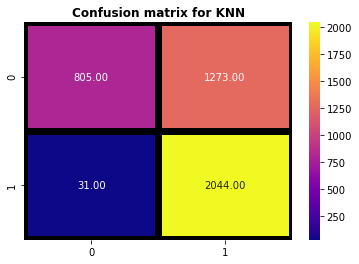

In [58]:
#plotting confusion matrix for knn
sns.heatmap(confusion_matrix(y_test,knn_pred),annot=True,fmt='0.2f',linewidth=6,linecolor='Black',cmap='plasma')
plt.title("Confusion matrix for KNN",fontweight='bold')
plt.show()

#### Observations:
   * There were 805 true positives and 2044 True negatives
   * 31 False Negatives and 1273 False postives
   * That is in all there were (1273+31)= 1304 errors

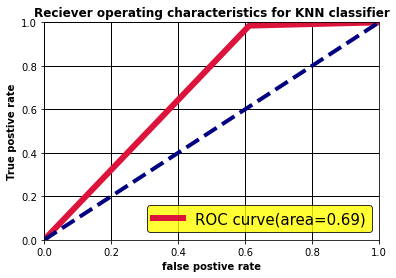

In [59]:
#auc plot for knn
fpr,tpr,thresholds=roc_curve(y_test,knn_pred)
roc_auc=auc(fpr,tpr)

plt.plot(fpr,tpr,color='Crimson',lw=6,label='ROC curve(area=%0.2f)'% roc_auc) 
plt.plot([0,1],[0,1],color='navy',lw=4,linestyle='--')

plt.xlim([0,1]) #limit on the scale from 0 to 1
plt.ylim([0,1])
plt.grid(color='k', linewidth=1)

plt.xlabel("false postive rate",fontweight='bold')
plt.ylabel("True postive rate",fontweight='bold')
plt.title("Reciever operating characteristics for KNN classifier",fontweight='bold')

plt.legend(loc="lower right",edgecolor='k',facecolor='Yellow',fontsize=15)
plt.show()

#### Observations:
    
   * The AUc is 0.69 for KNN classifier 

### 4) Multinomial NB

In [60]:
#hypertuning for multinomial
MNB=MultinomialNB()
parameters={"alpha":[0.0,1.0],"fit_prior":[True,False]}
                      
clf=GridSearchCV(MNB,parameters)
clf.fit(x_train[0:2001],y_train[0:2001])
print(clf.best_params_)

{'alpha': 1.0, 'fit_prior': False}


In [61]:
MNB=MultinomialNB(alpha=1.0,fit_prior=False)
MNB.fit(x_train,y_train)
MNB_pred = MNB.predict(x_test) #  predictions

#accuracy and cross validation score
MNB_accuracy=accuracy_score(y_test,MNB_pred)*100
print(" Accuracy of Multinomial nb classifier is = ", MNB_accuracy)
MNB_cv=cross_val_score(MNB,x,y,cv=3).mean()*100
print("cross validation score=",MNB_cv)
print("\n")

#auc
MNB_auc = np.round(roc_auc_score(y_test,MNB_pred), 3) 
print("Auc for Multinomial NB is {}". format(MNB_auc))
print("\n")

#classification report and confusion matrix
print("Confusion matrix \n\n ",confusion_matrix(y_test,MNB_pred))
print("\n")
print("classification report for Multinomial classifier \n\n",classification_report(y_test,MNB_pred))

 Accuracy of Multinomial nb classifier is =  90.75367204430532
cross validation score= 90.1979719370746


Auc for Multinomial NB is 0.908


Confusion matrix 

  [[1945  133]
 [ 251 1824]]


classification report for Multinomial classifier 

               precision    recall  f1-score   support

           0       0.89      0.94      0.91      2078
           1       0.93      0.88      0.90      2075

    accuracy                           0.91      4153
   macro avg       0.91      0.91      0.91      4153
weighted avg       0.91      0.91      0.91      4153



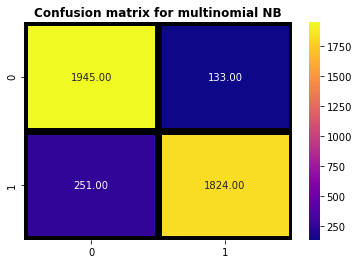

In [62]:
#plotting confusion matrix for multinomial NB
sns.heatmap(confusion_matrix(y_test,MNB_pred),annot=True,fmt='0.2f',linewidth=6,linecolor='Black',cmap='plasma')
plt.title("Confusion matrix for multinomial NB",fontweight='bold')
plt.show()

#### Observations:
   * There were 1945 true positives and 1824 True negatives
   * 251 False Negatives and 133 False postives
   * That is in all there were (133+251)=384 errors

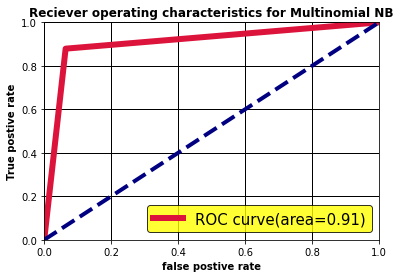

In [63]:
#Reciever operating characteristics for Multinomial NB
fpr,tpr,thresholds=roc_curve(y_test,MNB_pred)
roc_auc=auc(fpr,tpr)

plt.plot(fpr,tpr,color='Crimson',lw=6,label='ROC curve(area=%0.2f)'% roc_auc) 
plt.plot([0,1],[0,1],color='navy',lw=4,linestyle='--')

plt.xlim([0,1]) #limit on the scale from 0 to 1
plt.ylim([0,1])
plt.grid(color='k', linewidth=1)
plt.xlabel("false postive rate",fontweight='bold')
plt.ylabel("True postive rate",fontweight='bold')
plt.title("Reciever operating characteristics for Multinomial NB",fontweight='bold')

plt.legend(loc="lower right",edgecolor='k',facecolor='Yellow',fontsize=15)
plt.show()

#### Observations:
    
   * The AUc is 0.91 for Multinomial NB

### 5) SVC

In [64]:
#hypertuning for svc
from sklearn.model_selection import GridSearchCV
svc=SVC()
parameters={"kernel":["linear","poly","rbf"],"gamma":["scale","auto"]}
                      
clf=GridSearchCV(svc,parameters)
clf.fit(x_train[0:2001],y_train[0:2001])
print(clf.best_params_)

{'gamma': 'scale', 'kernel': 'linear'}


In [65]:
#using the best parameter for svc from the one's obtained above
svc=SVC(kernel='linear',gamma="scale")
svc.fit(x_train,y_train)
svc_pred=svc.predict(x_test)

#accuracy and cross validation score
svc_accuracy=accuracy_score(y_test,svc_pred)*100
print("Accuracy of SVC =",svc_accuracy)
svc_cv=cross_val_score(svc,x,y,cv=3).mean()*100
print("cross_validation score=",svc_cv)
print("\n")

#auc
svc_auc = np.round(roc_auc_score(y_test,svc_pred), 3) 
print("Auc for svc is {}". format(svc_auc))
print("\n")

#classification report and confusion matrix
print("confusion matrix \n\n",confusion_matrix(y_test,svc_pred))
print("\n")
print("classification report of SVC \n\n",classification_report(y_test,svc_pred))



Accuracy of SVC = 96.77341680712738
cross_validation score= 96.267032646724


Auc for svc is 0.968


confusion matrix 

 [[2008   70]
 [  64 2011]]


classification report of SVC 

               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2078
           1       0.97      0.97      0.97      2075

    accuracy                           0.97      4153
   macro avg       0.97      0.97      0.97      4153
weighted avg       0.97      0.97      0.97      4153



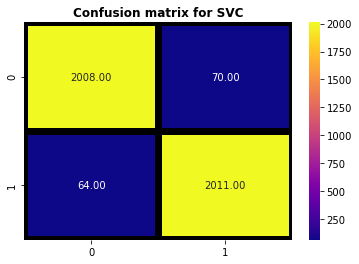

In [66]:
#plotting confusion matrix for SVC
sns.heatmap(confusion_matrix(y_test,svc_pred),annot=True,fmt='0.2f',linewidth=6,linecolor='Black',cmap='plasma')
plt.title("Confusion matrix for SVC",fontweight='bold')
plt.show()

#### Observations:
   * There were 2008 true positives and 2011 True negatives
   * 64 False Negatives and 70 False postives
   * That is in all there were (64+70)= 134 errors

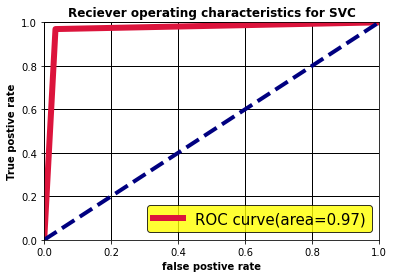

In [67]:
# plotting auc roc curve for svc
fpr,tpr,thresholds=roc_curve(y_test,svc_pred)
roc_auc=auc(fpr,tpr)

plt.plot(fpr,tpr,color='Crimson',lw=6,label='ROC curve(area=%0.2f)'% roc_auc) 
plt.plot([0,1],[0,1],color='navy',lw=4,linestyle='--')

plt.xlim([0,1])
plt.ylim([0,1])
plt.grid(color='k', linewidth=1)

plt.xlabel("false postive rate",fontweight='bold')
plt.ylabel("True postive rate",fontweight='bold')
plt.title("Reciever operating characteristics for SVC",fontweight='bold')

plt.legend(loc="lower right",edgecolor='k',facecolor='Yellow',fontsize=15)
plt.show()

#### Observations:
    
   * The AUc is 0.97 for SVC 

### 6) Gradient Boosting classifier

In [68]:
#hypertuning for gradient boosting classifier
gb=GradientBoostingClassifier()
parameters={"n_estimators":[10,20,30],"criterion":["mae",'mse'],'max_features':['auto','sqrt','log2'],'loss':['deviance','exponential']}
                      
clf=GridSearchCV(gb,parameters)
clf.fit(x_train[0:1001],y_train[0:1001])
print(clf.best_params_)

{'criterion': 'mse', 'loss': 'deviance', 'max_features': 'auto', 'n_estimators': 30}


In [69]:
#using the best parameter obtained above
gb=GradientBoostingClassifier(criterion="mse",n_estimators=30,max_features="auto",loss="deviance")
gb.fit(x_train,y_train)
gb_pred=gb.predict(x_test)

gb_accuracy=accuracy_score(y_test,gb_pred)*100
print("Accuracy of gradient boosting classifier",gb_accuracy)
gb_cv=cross_val_score(gb,x,y,cv=3).mean()*100
print("cross_validation score=",gb_cv)
print("\n")

#auc
gb_auc = np.round(roc_auc_score(y_test,gb_pred), 3) 
print("Auc for gradient boosting is {}". format(gb_auc))
print("\n")

print("confusion matrix \n\n",confusion_matrix(y_test,gb_pred))
print("\n")
print("classification report of Gradient Boosting classifier \n\n",classification_report(y_test,gb_pred))

Accuracy of gradient boosting classifier 95.78617866602455
cross_validation score= 95.63122651203409


Auc for gradient boosting is 0.958


confusion matrix 

 [[1983   95]
 [  80 1995]]


classification report of Gradient Boosting classifier 

               precision    recall  f1-score   support

           0       0.96      0.95      0.96      2078
           1       0.95      0.96      0.96      2075

    accuracy                           0.96      4153
   macro avg       0.96      0.96      0.96      4153
weighted avg       0.96      0.96      0.96      4153



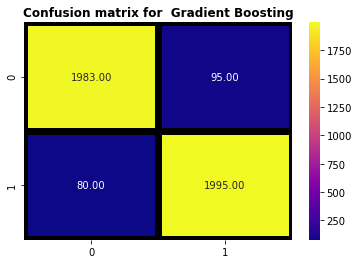

In [70]:
#plotting confusion matrix for Gradient Boosting
sns.heatmap(confusion_matrix(y_test,gb_pred),annot=True,fmt='0.2f',linewidth=6,linecolor='Black',cmap='plasma')
plt.title("Confusion matrix for  Gradient Boosting",fontweight='bold')
plt.show()

#### Observations:
   * There were 1983 true positives and 1995 True negatives
   * 80 False Negatives and 95 False postives
   * That is in all there were (80+95)= 175 errors

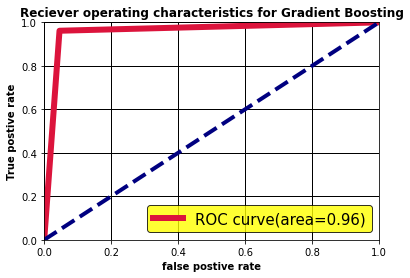

In [71]:
#auc roc for gradient boosting
fpr,tpr,thresholds=roc_curve(y_test,gb_pred)
roc_auc=auc(fpr,tpr)

plt.plot(fpr,tpr,color='Crimson',lw=6,label='ROC curve(area=%0.2f)'% roc_auc) 
plt.plot([0,1],[0,1],color='navy',lw=4,linestyle='--')

plt.xlim([0,1]) #limit on the scale from 0 to 1
plt.ylim([0,1])
plt.grid(color='k', linewidth=1)
plt.xlabel("false postive rate",fontweight='bold')
plt.ylabel("True postive rate",fontweight='bold')
plt.title("Reciever operating characteristics for Gradient Boosting",fontweight='bold')

plt.legend(loc="lower right",edgecolor='k',facecolor='Yellow',fontsize=15)
plt.show()

#### Observations:
    
   * The AUc is 0.96 for Gradient boosting classifier

### Comparing all the models

In [72]:
#creating a comparision table for better understanding

data_for_comparison=pd.DataFrame({
    "Model":["Logistic Regression","Passive Aggressive classifier","KNN","Multinomial","SVC","Gradient Boosting"],
    "Accuracy Score":[lg_accuracy,pac_accuracy,knn_accuracy,MNB_accuracy,svc_accuracy,gb_accuracy],
    "Cross Validation score":[lg_cv,pac_cv,knn_cv,MNB_cv,svc_cv,gb_cv],
    "AUC-ROC":[lg_auc,pac_auc,knn_auc,MNB_auc,svc_auc,gb_auc]})

data_for_comparison.sort_values(by="Accuracy Score",ascending=False,ignore_index=True)

,Model,Accuracy Score,Cross Validation score,AUC-ROC
0,SVC,96.773417,96.267033,0.968
1,Logistic Regression,96.315916,95.727575,0.963
2,Gradient Boosting,95.786179,95.631227,0.958
3,Passive Aggressive classifier,95.160125,94.899092,0.952
4,Multinomial,90.753672,90.197972,0.908
5,KNN,68.601011,79.042985,0.686


### Saving the best model

#### Deciding the best model
* From the above comparison table and classification reports of all the algorithms it is quite clear that the SVC and logistic regressions accuracy are high.
* Gradient Boosting is also working good but the auc is low as compared to SVC and logistic regression.
* KNN gives the least accuracy and AUC 
* SVC works very well with our data with an accuracy of 96.7 and cross validation of 96.26.SVC had precison and recall as 0.97 and the area under curve is 0.968 which is the highest among all.
* The number of False positives and False negatives are also minimum in case of svc.hence we will be finalizing SVC as our final model and save the same for future predictions.

In [73]:
#saving svct as our best model
import pickle
filename="fake news detection.pkl"
pickle.dump(svc,open(filename,'wb'))

In [74]:
#compare the actual and predicted values
actual=np.array(y_test)
predicted=np.array(svc.predict(x_test))

In [75]:
#save the actual and predicted values as dataframe
df_com=pd.DataFrame({"actual values":actual,"predicted values":predicted})
df_com

,actual values,predicted values
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
4148,0,0
4149,0,0
4150,0,0
4151,0,0


In [ ]:
# # #saving the dataframe as csv
# df_com.to_csv("predictions.csv")

#### Thank-you